## Check HDF5 File
Utility notebook used when make_plots.py isn't working as expected.<br>
Open an HDF5 output of workflows/SUEP_coffea.py and check out its contents.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def h5load(ifile, label):
    with pd.HDFStore(ifile, 'r') as store:
        data = store[label] 
        metadata = store.get_storer(label).attrs.metadata
        return data, metadata

In [3]:
f = '../test.hdf5'
df,m  = h5load(f, 'vars')

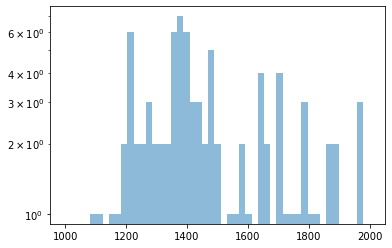

In [4]:
_ = plt.hist(df['ht'], alpha=0.5, bins=np.linspace(1000,2000,50))
plt.yscale('log')

In [5]:
df

,ntracks_track_down,ngood_fastjets_track_down,SUEP_genMass_track_down,SUEP_genPt_track_down,SUEP_genEta_track_down,SUEP_genPhi_track_down,SUEP_nconst_CL_track_down,SUEP_pt_avg_b_CL_track_down,SUEP_S1_CL_track_down,SUEP_pt_avg_CL_track_down,...,SUEP_genPhi_diff_CL,SUEP_genR_diff_CL,ISR_nconst_CL,ISR_pt_avg_b_CL,ISR_S1_CL,ISR_pt_avg_CL,ISR_pt_CL,ISR_eta_CL,ISR_phi_CL,ISR_mass_CL
0,361,2,900.0,748.0,-0.400391,-1.796875,259.0,1.594425,0.850099,3.231760,...,-0.008327,0.109132,49.0,1.550662,0.557968,4.791424,223.310389,1.389349,1.345037,124.658636
1,334,2,900.0,578.0,0.126465,-1.921875,212.0,1.810058,0.824242,3.262748,...,0.016692,0.032041,76.0,3.097220,0.563378,5.314003,347.720250,1.006906,1.416104,378.136831
2,326,3,900.0,684.0,0.902344,-0.309570,211.0,1.880002,0.748618,3.470199,...,-0.009688,0.204980,47.0,1.644151,0.561985,6.911286,306.925249,1.750085,-2.715675,156.449336
3,307,1,900.0,458.0,-0.623047,-1.937500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,368,2,900.0,892.0,-0.650391,2.671875,245.0,2.018462,0.821302,4.088744,...,0.023848,0.044394,59.0,3.917717,0.236574,13.905087,789.884226,0.903963,-0.484280,265.960387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,313,2,900.0,373.0,0.943359,2.492188,145.0,1.691220,0.727647,2.938534,...,0.165434,0.498877,110.0,1.954893,0.382104,3.394793,295.475207,1.294505,0.289459,306.145736
100,377,2,900.0,536.0,0.609375,0.941406,226.0,1.800882,0.719265,2.947998,...,-0.129294,0.284276,74.0,1.847132,0.646112,4.401526,306.979750,0.564219,-2.094723,166.268645
101,332,2,900.0,234.5,1.511719,-2.984375,174.0,1.906613,0.608680,3.520715,...,0.608577,1.425564,98.0,1.554452,0.385797,4.561793,399.429586,1.409481,0.745140,275.604634
102,273,2,900.0,463.0,-2.125000,0.970703,200.0,1.928334,0.746659,2.967859,...,-0.020722,0.511621,25.0,3.576687,0.374228,12.176270,299.864483,-0.081526,-2.167971,109.324359


In [60]:
a = original_order['ht_JEC']
b = new_order['ht_JEC']

print(len(a), len(b))

aa = a[a > 1200]
bb = b[b > 1200]

print(len(aa), len(bb))

2152 2152
1314 1312


In [5]:
f = '/data/submit/cms/store/user/lavezzo/SUEP/feb23/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD/merged/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_merged_0.hdf5'
event_vars, m = h5load(f,'vars')
f = '/data/submit/cms/store/user/lavezzo/SUEP/feb23/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD/merged/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_merged_1.hdf5'
event_vars_2, m = h5load(f,'vars')

In [6]:
f = '/data/submit/cms/store/user/lavezzo/SUEP/inference7_SUEPtracks/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD/merged/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_merged_0.hdf5'
event_vars_3, m = h5load(f,'vars')
f = '/data/submit/cms/store/user/lavezzo/SUEP/inference7_SUEPtracks/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD/merged/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_merged_1.hdf5'
event_vars_4, m = h5load(f,'vars')

In [7]:
new = pd.concat([event_vars, event_vars_2])
old = pd.concat([event_vars_3, event_vars_4])

In [8]:
new = new[new['ht_JEC']>1200]
old = old[old['ht_JEC']>1200]

In [9]:
print(new.shape)
print(old.shape)

(5191549, 43)
(5294924, 38)


In [18]:
import plot_utils

# ran these over old data
# original = old make_plots
# new = new make_plots
p0 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_sys_studies_v3.pkl')
p1 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_original.pkl')
p5 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_new.pkl')
p2 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_original_JEC.pkl')
p6 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_new_JEC.pkl')
p3 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_original_JEC_newRegions.pkl')

# this is running over new data
# the latter has the old regions, ht > 1200
p4 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_feb23_v2.pkl')
p7 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_new_newNtuples.pkl')

In [77]:
# ran these over old data
# original = old make_plots
# new = new make_plots
sample = 'QCD_HT1500to2000_TuneCP5_PSWeights_13TeV-madgraph-pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+MINIAODSIM'
q0 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/'+sample+'_sys_studies_v3.pkl')
#p1 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_original.pkl')
#p5 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_new.pkl')
#p2 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_original_JEC.pkl')
#p6 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_new_JEC.pkl')
#p3 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_original_JEC_newRegions.pkl')

# this is running over new data
# the latter has the old regions, ht > 1200
q4 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/'+sample+'_feb23_v2.pkl')
#p7 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_new_newNtuples.pkl')

1.0000000000000906


(0.5, 1.5)

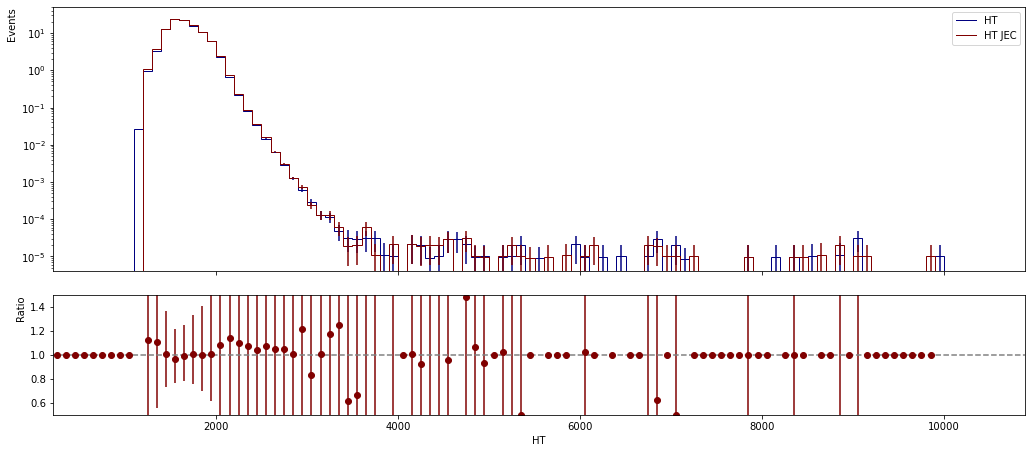

In [80]:
h1 = q4['ht_Cluster70']
h2 = q4['ht_JEC_Cluster70']

print(h1.sum().value/h2.sum().value)

fig, axs = plot_utils.plot_ratio([h1,h2], labels=['HT','HT JEC'])
fig.set_size_inches(18.5, 10.5)
axs[1].set_ylim(0.5, 1.5)

Text(0.5, 0, '# Leptons')

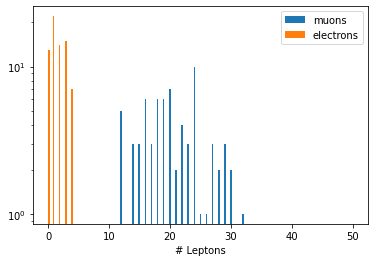

In [16]:
x = event_vars['n_sel_leps']
m = event_vars['n_sel_muons']
e = event_vars['n_sel_electrons']
#_= plt.hist(x+1, bins=np.linspace(0,50,200), label='total')
_= plt.hist(m, bins=np.linspace(0,50,200), label='muons')
_= plt.hist(e, bins=np.linspace(0,50,200), label='electrons')
plt.yscale('log')
plt.legend()
plt.xlabel("# Leptons")

64909205.15625
64774388.28125


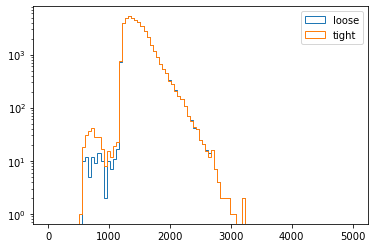

In [35]:
plt.hist(htloose, bins=np.linspace(0,5000,100),  histtype='step', label='loose')
plt.hist(httight, bins=np.linspace(0,5000,100), histtype='step', label='tight')
plt.yscale('log')
plt.legend()
print(np.sum(htloose))
print(np.sum(httight))